In [ ]:
import pandas as pd

# List all sheet names in the file
xls = pd.ExcelFile("/GBD_new.xlsx")
print(xls.sheet_names)

['Sheet1', 'summarise by year', 'summarise by country', 'clean']


In [ ]:
sheet_name = "clean"

In [ ]:
df = pd.read_excel(xls, sheet_name=sheet_name)


In [ ]:
df.head()

,location_type,location_name,cause_name,1990 (ASMR),2010 (ASMR),2019 (ASMR),2020 (ASMR),2021 (ASMR),1990 (New Age Deaths),1990 (All-Age Deaths),2010(New Age Deaths),2010 (All-Age Deaths),2019(New Age Deaths),2019 (All-Age Deaths),2020 (New Age Deaths),2020 (All-Age Deaths),2021 (New Age Deaths),2021 (All-Age Deaths)
0,Country,Australia,Acute lymphoid leukemia,0.87 (0.82-0.92),0.55 (0.52-0.59),0.41 (0.38-0.45),0.38 (0.35-0.41),0.38 (0.34-0.41),149.0,149.0 (140.8-158.2),139.5,139.5 (128.9-151.4),128.7,128.7 (116.5-140.6),122.6,122.6 (109.8-134.6),126.0,126.0 (112.1-139.2)
1,Country,Australia,Acute myeloid leukemia,2.21 (2.06-2.36),2.15 (1.96-2.36),3.08 (2.79-3.36),2.89 (2.60-3.16),2.96 (2.66-3.25),422.1,422.1 (393.3-452.8),683.3,683.3 (615.2-753.6),1309.6,1309.6 (1168.4-1435.4),1268.8,1268.8 (1132.4-1392.8),1351.2,1351.2 (1207.1-1488.5)
2,Country,Australia,Bladder cancer,3.92 (3.63-4.17),3.10 (2.80-3.33),2.80 (2.47-3.06),2.63 (2.30-2.89),2.72 (2.39-2.99),762.1,762.1 (708.1-809.8),1116.3,1116.3 (998.5-1199.7),1341.7,1341.7 (1177.2-1469.7),1301.9,1301.9 (1129.7-1434.1),1398.9,1398.9 (1219.6-1545.7)
3,Country,Australia,Brain and central nervous system cancer,4.87 (4.70-5.04),4.48 (4.24-4.66),4.45 (4.15-4.75),4.17 (3.87-4.46),4.24 (3.91-4.56),919.2,919.2 (885.6-950.6),1320.9,1320.9 (1239.9-1379.1),1638.8,1638.8 (1512.1-1756.7),1582.6,1582.6 (1446.1-1703.0),1656.7,1656.7 (1509.5-1793.8)
4,Country,Australia,Breast cancer,13.83 (12.86-14.71),9.75 (8.74-10.53),8.56 (7.49-9.51),8.00 (6.93-8.94),8.11 (7.08-9.08),2613.3,2613.3 (2433.1-2785.4),3172.3,3172.3 (2801.3-3446.8),3578.4,3578.4 (3063.0-4015.2),3434.6,3434.6 (2906.0-3879.4),3605.9,3605.9 (3082.5-4090.0)


In [ ]:
# Define the years to analyze
years = ["1990 (New Age Deaths)", "2010(New Age Deaths)", "2019(New Age Deaths)", "2020 (New Age Deaths)", "2021 (New Age Deaths)"]

# Loop through years and display top countries
# Group by location_name and sum all causes of death for the year
for year in years:
    print(f"\nTop 15 Countries for {year} - Chronic Diseases:\n")
    top_countries = (
        df.groupby("location_name")[year]  # Group by country and sum deaths
        .sum()                            # Sum all causes of death for each country
        .sort_values(ascending=False)     # Sort by total deaths in descending order
        .head(15)                         # Get the top 15 countries
    )
    print(top_countries)




Top 15 Countries for 1990 (New Age Deaths) - Chronic Diseases:

location_name
China                       3659910.8
India                       1633526.2
United States of America    1095547.4
Germany                      520971.2
Japan                        385466.9
United Kingdom               374974.0
Brazil                       300200.6
Viet Nam                     119416.1
Canada                       100316.8
Ethiopia                      72909.3
Australia                     66228.4
South Africa                  52283.7
Saudi Arabia                  25238.8
Mexico City                   16346.2
Rwanda                        12341.3
Name: 1990 (New Age Deaths), dtype: float64

Top 15 Countries for 2010(New Age Deaths) - Chronic Diseases:

location_name
China                       5120298.7
India                       2932384.4
United States of America    1140618.9
Japan                        502769.6
Brazil                       443661.4
Germany                      411453.3
U

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pivot the data for clustering
cluster_data = df.pivot_table(index="location_name", columns="cause_name", values="2021 (New Age Deaths)", aggfunc="sum").fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
cluster_data["Cluster"] = clusters
print(cluster_data)


cause_name                Acute lymphoid leukemia  Acute myeloid leukemia  \
location_name                                                               
Australia                                   126.0                  1351.2   
Brazil                                     1682.8                  4490.1   
Canada                                      207.2                  1721.3   
China                                     20604.3                 15329.8   
Ethiopia                                   2109.6                   728.1   
Germany                                     505.1                  4943.6   
India                                      7323.2                 10981.2   
Japan                                       890.5                  5578.2   
Mexico City                                 191.6                   185.6   
Rwanda                                       88.8                    51.9   
Saudi Arabia                                204.5                   310.8   

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/GBD_new.xlsx", sheet_name="clean")

# Define disease groups
cancer_diseases = [
    "Breast cancer", "Liver cancer due to hepatitis B", "Liver cancer due to hepatitis C",
    "Liver cancer due to alcohol use", "Ovarian cancer", "Prostate cancer", "Pancreatic cancer",
    "Thyroid cancer", "Stomach cancer", "Cervical cancer"
]

diabetes_diseases = [
    "Diabetes mellitus"
]

heart_diseases = [
    "Ischemic heart disease", "Hypertensive heart disease", "Rheumatic heart disease"
]

kidney_pulmonary_diseases = [
    "Chronic kidney disease due to diabetes mellitus type 1",
    "Chronic kidney disease due to diabetes mellitus type 2",
    "Chronic obstructive pulmonary disease", "Chronic kidney disease due to hypertension",
    "Chronic kidney disease due to glomerulonephritis"
]

# Filter the dataset for the selected diseases
selected_diseases = cancer_diseases + diabetes_diseases + heart_diseases + kidney_pulmonary_diseases
filtered_df = df[df["cause_name"].isin(selected_diseases)]

# Pivot the data for clustering
pivot_data = filtered_df.pivot_table(
    index="location_name",
    columns="cause_name",
    values="2021 (New Age Deaths)",
    aggfunc="sum"
).fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
pivot_data["Cluster"] = clusters

# Display the clustered data
print(pivot_data)


cause_name                Breast cancer  Cervical cancer  \
location_name                                              
Australia                        3605.9            405.9   
Brazil                          23850.4          11247.8   
Canada                           6110.5            758.7   
China                           91504.8          49837.5   
Ethiopia                         4875.1           4488.2   
Germany                         20857.0           2300.9   
India                           80821.0          60046.6   
Japan                           16824.6           3890.8   
Mexico City                       975.2            411.9   
Rwanda                            888.1            902.6   
Saudi Arabia                     1223.7            104.1   
South Africa                     6556.1           5963.1   
United Kingdom                  13912.4           1315.3   
United States of America        53471.4           7202.8   
Viet Nam                         6401.1 

In [ ]:
# Reset the pivot table to include the country name as a column
clean_table = pivot_data.reset_index()

# Display the cleaned table
print(clean_table)

# Save the cleaned table to an Excel file (optional, for easier visualization)
clean_table.to_excel("Clean_Chronic_Disease_Table.xlsx", index=False)


cause_name             location_name  Breast cancer  Cervical cancer  \
0                          Australia         3605.9            405.9   
1                             Brazil        23850.4          11247.8   
2                             Canada         6110.5            758.7   
3                              China        91504.8          49837.5   
4                           Ethiopia         4875.1           4488.2   
5                            Germany        20857.0           2300.9   
6                              India        80821.0          60046.6   
7                              Japan        16824.6           3890.8   
8                        Mexico City          975.2            411.9   
9                             Rwanda          888.1            902.6   
10                      Saudi Arabia         1223.7            104.1   
11                      South Africa         6556.1           5963.1   
12                    United Kingdom        13912.4           13

In [ ]:
from IPython.display import display

# Display a clean table in Jupyter/Colab
display(clean_table.head(50))  # Show the first 10 rows


cause_name,location_name,Breast cancer,Cervical cancer,Chronic kidney disease due to diabetes mellitus type 1,Chronic kidney disease due to diabetes mellitus type 2,Chronic kidney disease due to glomerulonephritis,Chronic kidney disease due to hypertension,Chronic obstructive pulmonary disease,Ischemic heart disease,Liver cancer due to alcohol use,Liver cancer due to hepatitis B,Liver cancer due to hepatitis C,Ovarian cancer,Pancreatic cancer,Prostate cancer,Rheumatic heart disease,Stomach cancer,Thyroid cancer,Cluster
0,Australia,3605.9,405.9,23.3,389.9,1285.3,1282.3,9481.0,23026.9,890.2,263.8,766.1,1139.6,3699.6,4469.3,482.4,1795.7,170.3,0
1,Brazil,23850.4,11247.8,2939.1,17367.0,6676.0,15326.1,63666.2,157528.4,1449.2,890.5,1718.3,5503.9,15637.4,21174.6,2721.6,24374.2,1206.3,0
2,Canada,6110.5,758.7,75.2,1952.0,925.8,3981.0,15144.3,41486.4,1626.8,196.0,748.0,2001.4,5928.5,5543.6,783.7,2912.2,270.2,0
3,China,91504.8,49837.5,20697.8,107610.2,5322.4,65323.3,1285755.1,1956493.2,18325.5,100236.4,34909.4,25139.4,119645.7,37359.6,78893.9,445021.1,7694.4,2
4,Ethiopia,4875.1,4488.2,1630.1,5987.8,3420.1,4124.5,8818.2,20968.8,188.6,325.4,435.7,1211.0,476.5,1488.3,1297.2,2845.7,753.3,0
5,Germany,20857.0,2300.9,189.0,6660.1,6433.6,7845.8,40490.7,150587.2,3603.3,738.8,2858.3,6008.4,21476.6,18373.9,5973.3,11832.2,860.5,0
6,India,80821.0,60046.6,15469.2,56203.4,24435.1,33968.2,1065536.1,1632375.1,9308.4,12258.0,6914.9,23222.4,17917.1,24998.4,166102.0,68525.4,7158.8,1
7,Japan,16824.6,3890.8,611.3,18929.6,574.1,8052.4,32771.8,123139.3,3162.3,3041.8,22709.2,5685.9,42059.3,15989.1,4725.5,58004.8,2292.0,0
8,Mexico City,975.2,411.9,305.3,1291.3,1383.9,1289.7,2484.6,11653.5,85.2,30.8,265.0,424.7,657.1,746.7,117.3,1040.5,109.9,0
9,Rwanda,888.1,902.6,106.9,414.0,789.0,404.5,1603.6,3192.0,63.3,74.4,88.5,248.0,156.8,492.5,171.2,410.4,53.2,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the pivot table
pivot_data["Cluster"] = clusters

# Display the data with clusters
print(pivot_data)


cause_name                Breast cancer  Cervical cancer  \
location_name                                              
Australia                        3605.9            405.9   
Brazil                          23850.4          11247.8   
Canada                           6110.5            758.7   
China                           91504.8          49837.5   
Ethiopia                         4875.1           4488.2   
Germany                         20857.0           2300.9   
India                           80821.0          60046.6   
Japan                           16824.6           3890.8   
Mexico City                       975.2            411.9   
Rwanda                            888.1            902.6   
Saudi Arabia                     1223.7            104.1   
South Africa                     6556.1           5963.1   
United Kingdom                  13912.4           1315.3   
United States of America        53471.4           7202.8   
Viet Nam                         6401.1 

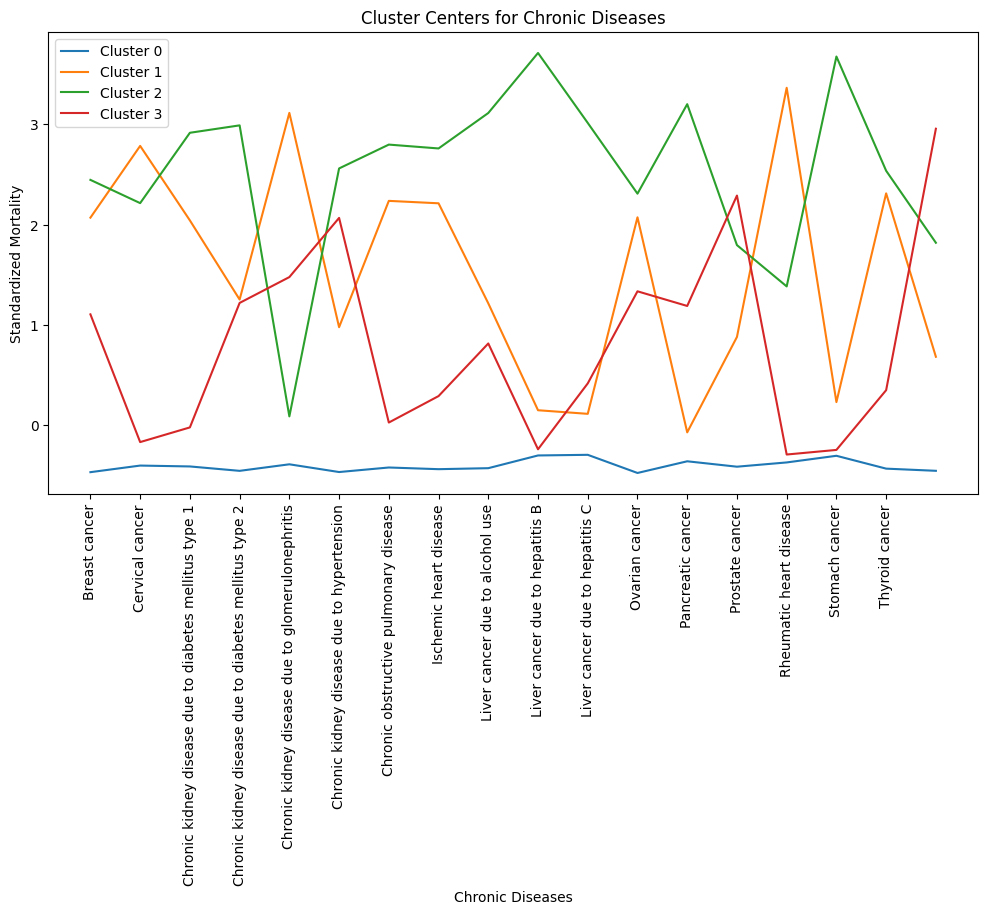

In [ ]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers to see the patterns
plt.figure(figsize=(12, 6))
for i, center in enumerate(cluster_centers):
    plt.plot(center, label=f"Cluster {i}")
plt.xticks(range(len(pivot_data.columns[:-1])), pivot_data.columns[:-1], rotation=90)
plt.title("Cluster Centers for Chronic Diseases")
plt.xlabel("Chronic Diseases")
plt.ylabel("Standardized Mortality")
plt.legend()
plt.show()


<ipython-input-32-7efa21dafc8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


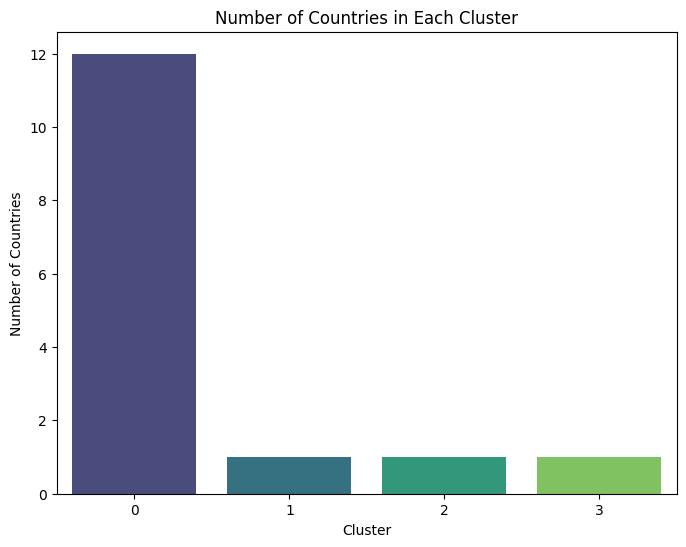

In [ ]:
# Count countries in each cluster
cluster_counts = pivot_data["Cluster"].value_counts()

# Plot the distribution of clusters
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Number of Countries in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.show()


In [ ]:
# Define descriptive labels for the clusters
cluster_labels = {
    0: "High Cancer Mortality",
    1: "High Diabetes Mortality",
    2: "High Heart Disease Mortality",
    3: "High Chronic Kidney/Pulmonary Mortality"
}

# Map the cluster numbers to their labels
pivot_data["Cluster Label"] = pivot_data["Cluster"].map(cluster_labels)

# Reset the index for cleaner output
clean_table = pivot_data.reset_index()

# Drop the numerical cluster column if only the labels are needed
clean_table = clean_table.drop(columns=["Cluster"])

# Display the cleaned table with cluster labels
print(clean_table)

# Save the output to an Excel file (optional)
clean_table.to_excel("Labeled_Chronic_Disease_Table.xlsx", index=False)


cause_name             location_name  Breast cancer  Cervical cancer  \
0                          Australia         3605.9            405.9   
1                             Brazil        23850.4          11247.8   
2                             Canada         6110.5            758.7   
3                              China        91504.8          49837.5   
4                           Ethiopia         4875.1           4488.2   
5                            Germany        20857.0           2300.9   
6                              India        80821.0          60046.6   
7                              Japan        16824.6           3890.8   
8                        Mexico City          975.2            411.9   
9                             Rwanda          888.1            902.6   
10                      Saudi Arabia         1223.7            104.1   
11                      South Africa         6556.1           5963.1   
12                    United Kingdom        13912.4           13

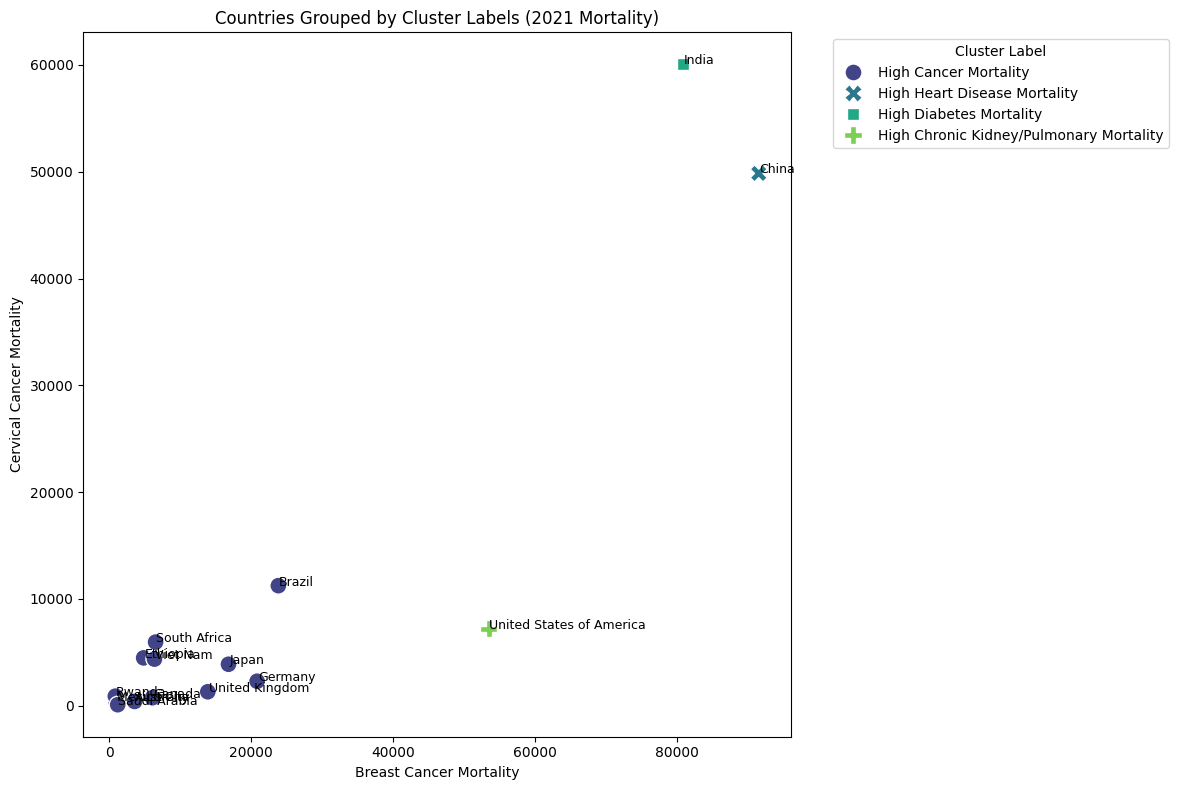

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add descriptive labels for clusters
cluster_labels = {
    0: "High Cancer Mortality",
    1: "High Diabetes Mortality",
    2: "High Heart Disease Mortality",
    3: "High Chronic Kidney/Pulmonary Mortality"
}

# Map the cluster numbers to their labels
pivot_data["Cluster Label"] = pivot_data["Cluster"].map(cluster_labels)

# Reset the index for cleaner plotting
clean_table = pivot_data.reset_index()

# Scatterplot to visualize clusters by labels
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=clean_table,
    x="Breast cancer",  # Use one disease metric for X-axis
    y="Cervical cancer",  # Use another disease metric for Y-axis
    hue="Cluster Label",  # Use cluster labels for coloring
    style="Cluster Label",  # Use different markers for clusters
    s=150,  # Adjust marker size
    palette="viridis"
)

# Annotate country names on the plot
for i in range(len(clean_table)):
    plt.text(
        clean_table["Breast cancer"].iloc[i] + 100,  # Offset X position
        clean_table["Cervical cancer"].iloc[i],     # Y position
        clean_table["location_name"].iloc[i],       # Country name
        fontsize=9
    )

# Customize plot
plt.title("Countries Grouped by Cluster Labels (2021 Mortality)")
plt.xlabel("Breast Cancer Mortality")
plt.ylabel("Cervical Cancer Mortality")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


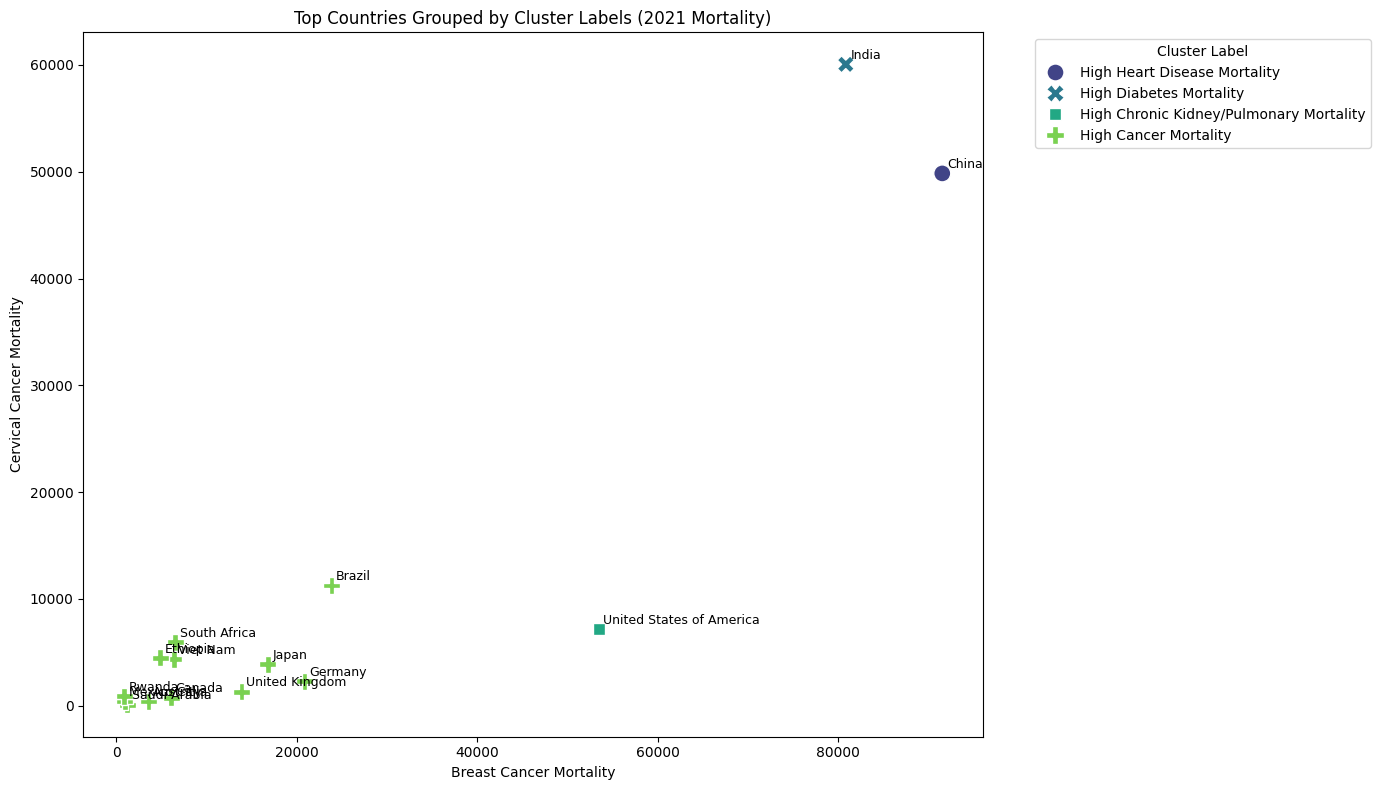

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of top countries to display
top_n = 15  # Adjust as needed

# Sort the data by a key column (e.g., "Breast cancer") to pick the top countries
top_countries = clean_table.sort_values(by="Breast cancer", ascending=False).head(top_n)

# Scatterplot to visualize clusters with clearer labels
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top_countries,
    x="Breast cancer",  # Adjust to the metric you'd like on the x-axis
    y="Cervical cancer",  # Adjust to the metric you'd like on the y-axis
    hue="Cluster Label",
    style="Cluster Label",
    s=150,
    palette="viridis"
)

# Annotate country names with offset to prevent overlapping
for i in range(len(top_countries)):
    plt.text(
        top_countries["Breast cancer"].iloc[i] + 500,  # Adjust offset on x-axis
        top_countries["Cervical cancer"].iloc[i] + 500,  # Adjust offset on y-axis
        top_countries["location_name"].iloc[i],
        fontsize=9
    )

# Customize the plot
plt.title("Top Countries Grouped by Cluster Labels (2021 Mortality)")
plt.xlabel("Breast Cancer Mortality")
plt.ylabel("Cervical Cancer Mortality")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
# Group countries by their cluster labels
grouped_clusters = clean_table.groupby("Cluster Label")["location_name"].apply(list)

# Display the grouped clusters in a tabular format
for cluster, countries in grouped_clusters.items():
    print(f"\n{cluster}:")
    for country in countries:
        print(f"  - {country}")



High Cancer Mortality:
  - Australia
  - Brazil
  - Canada
  - Ethiopia
  - Germany
  - Japan
  - Mexico City
  - Rwanda
  - Saudi Arabia
  - South Africa
  - United Kingdom
  - Viet Nam

High Chronic Kidney/Pulmonary Mortality:
  - United States of America

High Diabetes Mortality:
  - India

High Heart Disease Mortality:
  - China


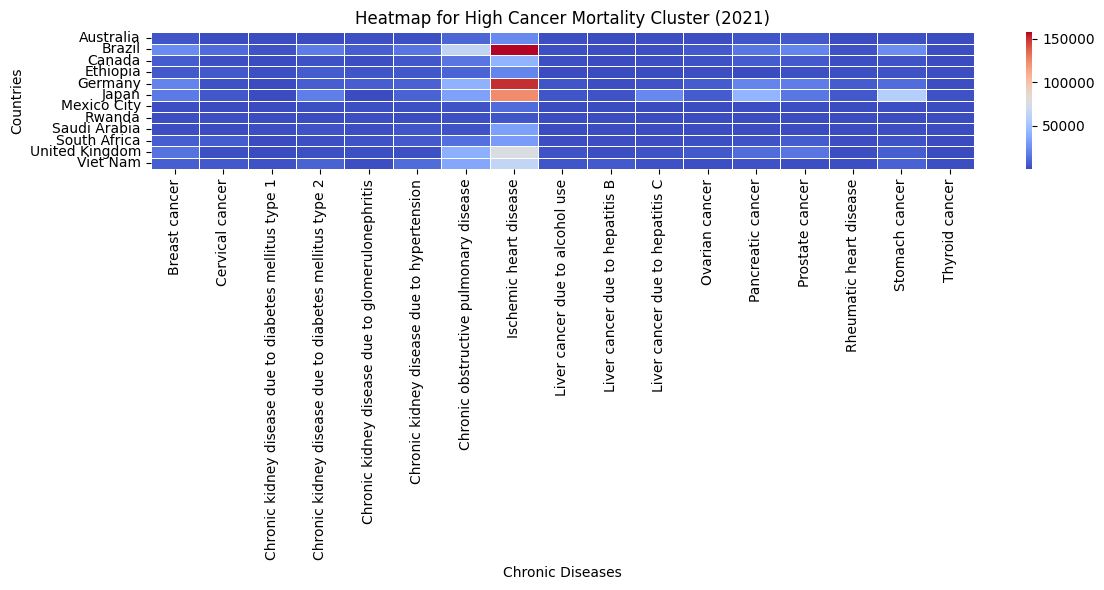

In [ ]:
# Filter the data for a specific cluster
specific_cluster = clean_table[clean_table["Cluster Label"] == "High Cancer Mortality"]

# Prepare heatmap data for the specific cluster
specific_heatmap_data = specific_cluster.drop(columns=["Cluster Label", "Cluster"]).set_index("location_name")

# Plot the heatmap for the specific cluster
plt.figure(figsize=(12, 6))
sns.heatmap(
    specific_heatmap_data,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Heatmap for High Cancer Mortality Cluster (2021)")
plt.xlabel("Chronic Diseases")
plt.ylabel("Countries")
plt.tight_layout()
plt.show()



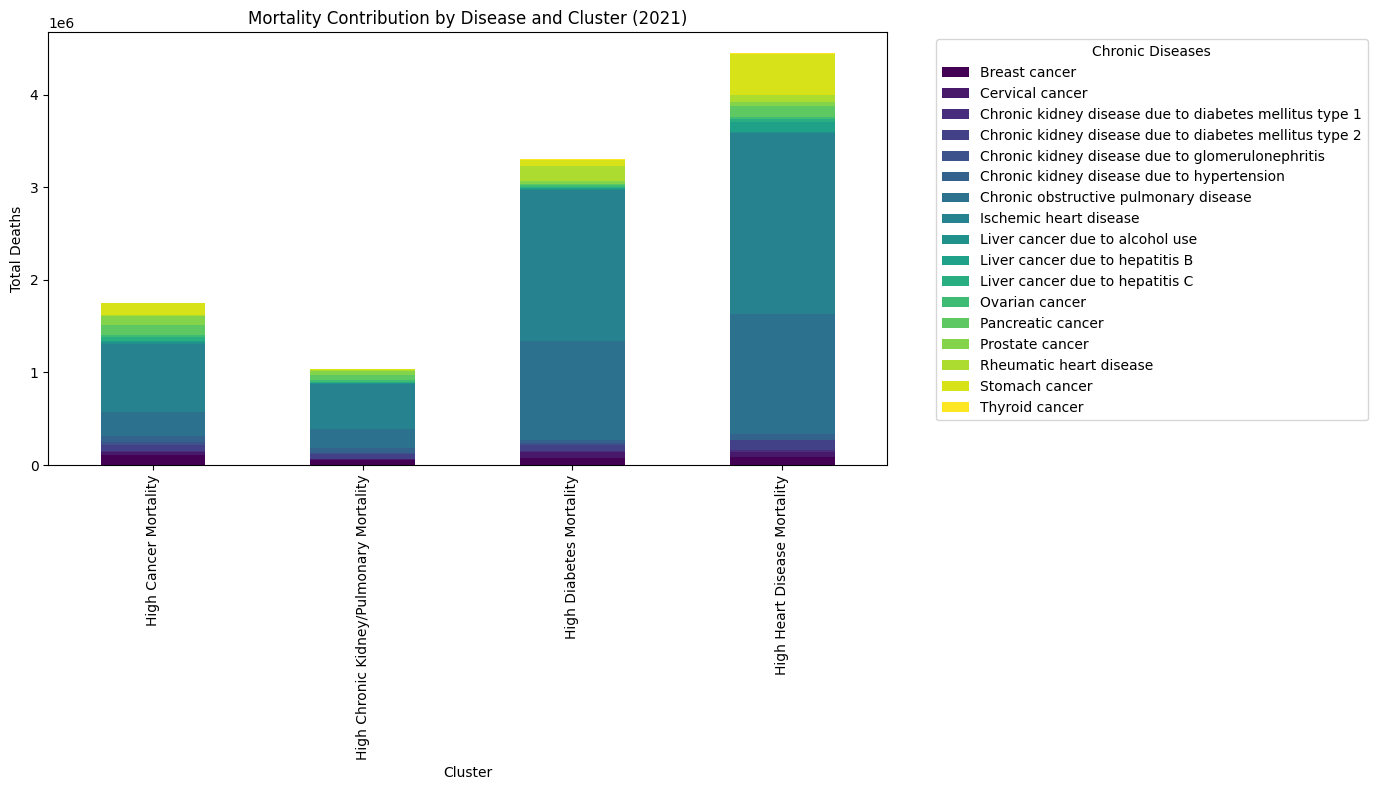

In [ ]:
# Sum deaths for each disease by cluster
disease_by_cluster = clean_table.drop(columns=["Cluster"]).groupby("Cluster Label").sum()

# Plot a stacked bar chart
disease_by_cluster.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Mortality Contribution by Disease and Cluster (2021)")
plt.xlabel("Cluster")
plt.ylabel("Total Deaths")
plt.legend(title="Chronic Diseases", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [1]:
# Install GeoPandas if not already installed
!pip install geopandas

# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Data: Countries and their high-mortality disease clusters
data = {
    'Country': [
        'Australia', 'Brazil', 'Canada', 'Ethiopia', 'Germany', 'Japan',
        'Mexico', 'Rwanda', 'Saudi Arabia', 'South Africa', 'United Kingdom',
        'Viet Nam', 'United States of America', 'India', 'China'
    ],
    'High Mortality Disease': [
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
        'Cancer', 'Chronic Kidney/Pulmonary', 'Diabetes', 'Heart Disease'
    ]
}

# Create a dataframe from the data
df = pd.DataFrame(data)

# Merge the dataframe with the world map based on country names
merged = world.merge(df, how='left', left_on='name', right_on='Country')

# Assign colors to each disease category
colors = {
    'Cancer': 'red',
    'Chronic Kidney/Pulmonary': 'blue',
    'Diabetes': 'green',
    'Heart Disease': 'orange'
}

# Add a column for color coding based on the disease
merged['Color'] = merged['High Mortality Disease'].map(colors)

# Plot the map
plt.figure(figsize=(15, 10))
base = world.boundary.plot(figsize=(15, 10), color='black', linewidth=0.5)
merged.plot(ax=base, color=merged['Color'], legend=True, edgecolor='black')

# Add title and legend
plt.title('High Mortality Disease by Country', fontsize=16)
handles = [plt.Line2D([0], [0], color=color, linewidth=5, label=disease) for disease, color in colors.items()]
plt.legend(handles=handles, title='High Mortality Disease', fontsize=12)

# Display the map
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.